# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


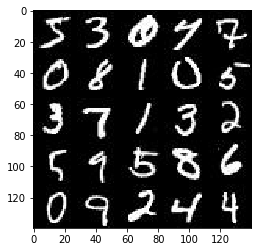

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

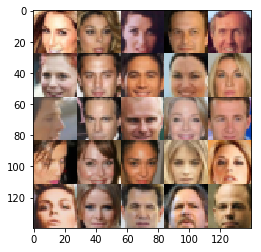

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0


C:\anaconda\envs\dl\lib\site-packages\ipykernel\__main__.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    inputs_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='inputs_real')
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name='inputs_z')
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')
    return inputs_real, inputs_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    alpha = 0.2
    stddev = 0.02
    with tf.variable_scope('discriminator', reuse=reuse):
        conv1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same',kernel_initializer=tf.random_normal_initializer(stddev=stddev))
        lrelu1 = tf.maximum(alpha * conv1, conv1)
        
        conv2 = tf.layers.conv2d(lrelu1, 128, 5, strides=2, padding='same',kernel_initializer=tf.random_normal_initializer(stddev=stddev))
        batch_norm2 = tf.layers.batch_normalization(conv2, training=True)
        lrelu2 = tf.maximum(alpha * batch_norm2, batch_norm2)
        
        conv3 = tf.layers.conv2d(lrelu2, 256, 5, strides=2, padding='same',kernel_initializer=tf.random_normal_initializer(stddev=stddev))
        batch_norm3 = tf.layers.batch_normalization(conv3, training=True)
        lrelu3 = tf.maximum(alpha * batch_norm3, batch_norm3)

        flat = tf.reshape(lrelu3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    alpha = 0.2
    stddev = 0.02
    
    with tf.variable_scope('generator', reuse=not is_train):
    
        fc = tf.layers.dense(z, 7*7*256)
        fc = tf.reshape(fc, (-1, 7, 7, 256))
        fc = tf.layers.batch_normalization(fc, training=is_train)
        
        deconv2 = tf.layers.conv2d_transpose(fc, 128, 5, strides=2, padding='same',kernel_initializer=tf.random_normal_initializer(stddev=stddev))
        deconv2 = tf.layers.batch_normalization(deconv2, training=is_train)
        deconv2 = tf.maximum(alpha*deconv2, deconv2)
        
        deconv3 = tf.layers.conv2d_transpose(deconv2, 64, 5, strides=2, padding='same',kernel_initializer=tf.random_normal_initializer(stddev=stddev))
        deconv3 = tf.layers.batch_normalization(deconv3, training=is_train)
        deconv3 = tf.maximum(alpha*deconv3, deconv3)
        
        logits = tf.layers.conv2d_transpose(deconv3, out_channel_dim, 5, strides=1, padding='same',kernel_initializer=tf.random_normal_initializer(stddev=stddev))
        out = tf.tanh(logits)
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    smooth = 0.1
    g_model = generator(input_z, out_channel_dim, is_train=True)
    d_model_real, d_logits_real = discriminator(input_real, reuse=False)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
     
    d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)*(1-smooth)))
    d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))
    d_loss = d_loss_real + d_loss_fake
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]

    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    steps = 0
    show_every = 100
    print_every = 10
    n_images = 32
    
    # TODO: Build Model
    n_samples, width, height, channels = data_shape
    
    input_real, input_z, learn_rate = model_inputs(width, height, channels, z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, channels)
    d_opt, g_opt = model_opt(d_loss, g_loss, learn_rate, beta1)
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                
                # reshape and re-scale bacth image
                batch_images *= 2.0
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, learn_rate: learning_rate})
                _ = sess.run(g_opt, feed_dict={input_real: batch_images, input_z: batch_z, learn_rate: learning_rate})

                if steps % print_every == 0:
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    
                if steps % show_every == 0:    
                    show_generator_output(sess, n_images, input_z, channels, data_image_mode)
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 0/2... Discriminator Loss: 6.4473... Generator Loss: 0.0056
Epoch 0/2... Discriminator Loss: 1.9698... Generator Loss: 0.6694
Epoch 0/2... Discriminator Loss: 1.5616... Generator Loss: 0.8641
Epoch 0/2... Discriminator Loss: 1.3418... Generator Loss: 0.6329
Epoch 0/2... Discriminator Loss: 1.3368... Generator Loss: 0.8602
Epoch 0/2... Discriminator Loss: 1.4924... Generator Loss: 0.5936
Epoch 0/2... Discriminator Loss: 1.6210... Generator Loss: 0.3998
Epoch 0/2... Discriminator Loss: 1.3598... Generator Loss: 0.6165
Epoch 0/2... Discriminator Loss: 1.2562... Generator Loss: 0.7585
Epoch 0/2... Discriminator Loss: 1.7134... Generator Loss: 0.3619


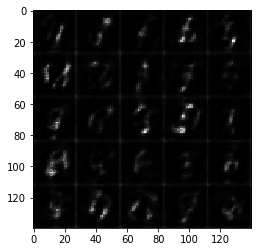

Epoch 0/2... Discriminator Loss: 1.1312... Generator Loss: 0.8970
Epoch 0/2... Discriminator Loss: 1.1019... Generator Loss: 0.8049
Epoch 0/2... Discriminator Loss: 1.2747... Generator Loss: 1.4603
Epoch 0/2... Discriminator Loss: 1.1248... Generator Loss: 1.1354
Epoch 0/2... Discriminator Loss: 1.1025... Generator Loss: 0.8517
Epoch 0/2... Discriminator Loss: 0.9981... Generator Loss: 0.9925
Epoch 0/2... Discriminator Loss: 0.9655... Generator Loss: 1.5471
Epoch 0/2... Discriminator Loss: 0.9913... Generator Loss: 1.0796
Epoch 0/2... Discriminator Loss: 1.5113... Generator Loss: 0.4553
Epoch 0/2... Discriminator Loss: 1.1264... Generator Loss: 2.4841


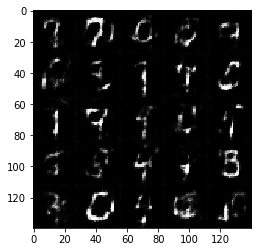

Epoch 0/2... Discriminator Loss: 1.0376... Generator Loss: 1.0087
Epoch 0/2... Discriminator Loss: 0.9878... Generator Loss: 1.7746
Epoch 0/2... Discriminator Loss: 1.0984... Generator Loss: 0.9335
Epoch 0/2... Discriminator Loss: 1.4612... Generator Loss: 0.5085
Epoch 0/2... Discriminator Loss: 1.0528... Generator Loss: 1.1833
Epoch 0/2... Discriminator Loss: 1.0580... Generator Loss: 1.7052
Epoch 0/2... Discriminator Loss: 1.5457... Generator Loss: 2.0481
Epoch 0/2... Discriminator Loss: 1.2655... Generator Loss: 0.9843
Epoch 0/2... Discriminator Loss: 1.1847... Generator Loss: 0.7308
Epoch 0/2... Discriminator Loss: 1.1585... Generator Loss: 0.8020


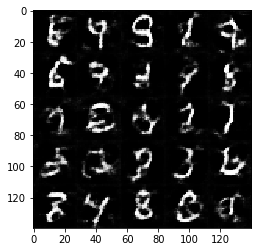

Epoch 0/2... Discriminator Loss: 1.1709... Generator Loss: 1.2012
Epoch 0/2... Discriminator Loss: 1.2870... Generator Loss: 0.6748
Epoch 0/2... Discriminator Loss: 0.9720... Generator Loss: 1.3511
Epoch 0/2... Discriminator Loss: 1.1786... Generator Loss: 0.7923
Epoch 0/2... Discriminator Loss: 0.9653... Generator Loss: 1.1763
Epoch 0/2... Discriminator Loss: 0.9368... Generator Loss: 1.2579
Epoch 0/2... Discriminator Loss: 1.0877... Generator Loss: 1.0454
Epoch 0/2... Discriminator Loss: 0.9685... Generator Loss: 1.3841
Epoch 0/2... Discriminator Loss: 1.2046... Generator Loss: 0.9985
Epoch 0/2... Discriminator Loss: 1.4614... Generator Loss: 0.5254


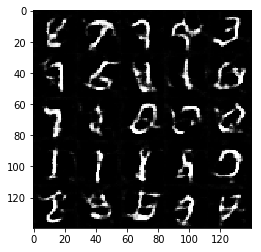

Epoch 0/2... Discriminator Loss: 1.1573... Generator Loss: 0.7467
Epoch 0/2... Discriminator Loss: 0.9785... Generator Loss: 1.2736
Epoch 0/2... Discriminator Loss: 1.0153... Generator Loss: 1.0599
Epoch 0/2... Discriminator Loss: 1.0183... Generator Loss: 1.0078
Epoch 0/2... Discriminator Loss: 0.9486... Generator Loss: 1.9227
Epoch 0/2... Discriminator Loss: 1.2218... Generator Loss: 0.6789
Epoch 0/2... Discriminator Loss: 1.8828... Generator Loss: 0.3072
Epoch 0/2... Discriminator Loss: 1.1261... Generator Loss: 0.8982
Epoch 0/2... Discriminator Loss: 0.9957... Generator Loss: 1.3089
Epoch 0/2... Discriminator Loss: 0.9056... Generator Loss: 1.2482


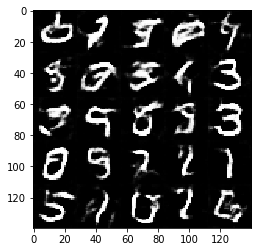

Epoch 0/2... Discriminator Loss: 1.2867... Generator Loss: 0.6668
Epoch 0/2... Discriminator Loss: 1.1745... Generator Loss: 0.7394
Epoch 0/2... Discriminator Loss: 0.9050... Generator Loss: 1.3075
Epoch 0/2... Discriminator Loss: 0.9237... Generator Loss: 1.2380
Epoch 0/2... Discriminator Loss: 0.8914... Generator Loss: 1.6461
Epoch 0/2... Discriminator Loss: 1.2498... Generator Loss: 1.9911
Epoch 0/2... Discriminator Loss: 1.2602... Generator Loss: 1.1117
Epoch 0/2... Discriminator Loss: 0.9646... Generator Loss: 1.4157
Epoch 0/2... Discriminator Loss: 1.0626... Generator Loss: 0.7869
Epoch 0/2... Discriminator Loss: 0.9656... Generator Loss: 1.6247


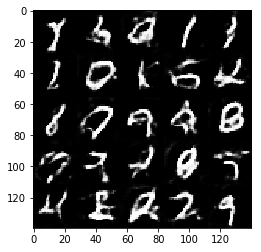

Epoch 0/2... Discriminator Loss: 1.0054... Generator Loss: 1.6885
Epoch 0/2... Discriminator Loss: 0.9381... Generator Loss: 1.1840
Epoch 0/2... Discriminator Loss: 1.0100... Generator Loss: 1.2744
Epoch 0/2... Discriminator Loss: 1.1806... Generator Loss: 0.6843
Epoch 0/2... Discriminator Loss: 1.2416... Generator Loss: 0.6751
Epoch 0/2... Discriminator Loss: 1.0712... Generator Loss: 1.0932
Epoch 0/2... Discriminator Loss: 1.0842... Generator Loss: 0.9565
Epoch 0/2... Discriminator Loss: 1.0421... Generator Loss: 1.0477
Epoch 0/2... Discriminator Loss: 0.9187... Generator Loss: 1.1984
Epoch 0/2... Discriminator Loss: 1.1315... Generator Loss: 0.7238


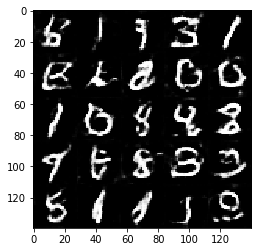

Epoch 0/2... Discriminator Loss: 1.0096... Generator Loss: 1.0371
Epoch 0/2... Discriminator Loss: 0.9879... Generator Loss: 0.9152
Epoch 0/2... Discriminator Loss: 0.8099... Generator Loss: 1.5500
Epoch 0/2... Discriminator Loss: 1.5331... Generator Loss: 0.4470
Epoch 0/2... Discriminator Loss: 1.2239... Generator Loss: 1.2235
Epoch 0/2... Discriminator Loss: 0.9360... Generator Loss: 1.1212
Epoch 0/2... Discriminator Loss: 0.9552... Generator Loss: 1.0674
Epoch 0/2... Discriminator Loss: 1.0570... Generator Loss: 1.0251
Epoch 0/2... Discriminator Loss: 1.0224... Generator Loss: 0.9443
Epoch 0/2... Discriminator Loss: 1.4541... Generator Loss: 0.4864


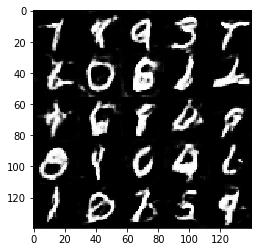

Epoch 0/2... Discriminator Loss: 0.9811... Generator Loss: 1.0059
Epoch 0/2... Discriminator Loss: 0.8580... Generator Loss: 1.2134
Epoch 0/2... Discriminator Loss: 0.8684... Generator Loss: 1.3354
Epoch 0/2... Discriminator Loss: 0.8331... Generator Loss: 1.1240
Epoch 0/2... Discriminator Loss: 1.0022... Generator Loss: 1.5640
Epoch 0/2... Discriminator Loss: 1.2288... Generator Loss: 1.1403
Epoch 0/2... Discriminator Loss: 1.0527... Generator Loss: 1.0699
Epoch 0/2... Discriminator Loss: 0.8745... Generator Loss: 1.6866
Epoch 0/2... Discriminator Loss: 1.1817... Generator Loss: 1.4693
Epoch 0/2... Discriminator Loss: 1.1795... Generator Loss: 0.9172


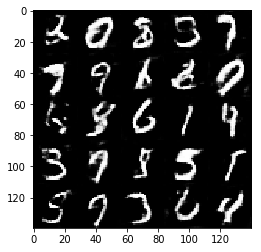

Epoch 0/2... Discriminator Loss: 0.9546... Generator Loss: 1.0328
Epoch 0/2... Discriminator Loss: 1.1024... Generator Loss: 0.9034
Epoch 0/2... Discriminator Loss: 0.9111... Generator Loss: 0.9694
Epoch 1/2... Discriminator Loss: 1.1073... Generator Loss: 0.8204
Epoch 1/2... Discriminator Loss: 0.8674... Generator Loss: 1.0825
Epoch 1/2... Discriminator Loss: 0.8919... Generator Loss: 1.1315
Epoch 1/2... Discriminator Loss: 0.8697... Generator Loss: 1.7257
Epoch 1/2... Discriminator Loss: 1.2306... Generator Loss: 0.6913
Epoch 1/2... Discriminator Loss: 1.2843... Generator Loss: 0.6594
Epoch 1/2... Discriminator Loss: 1.1036... Generator Loss: 0.7770


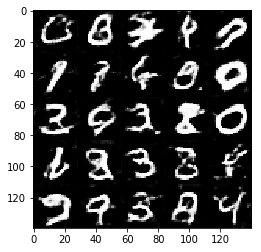

Epoch 1/2... Discriminator Loss: 0.8085... Generator Loss: 1.3104
Epoch 1/2... Discriminator Loss: 0.8683... Generator Loss: 1.1714
Epoch 1/2... Discriminator Loss: 0.6867... Generator Loss: 1.4309
Epoch 1/2... Discriminator Loss: 1.4852... Generator Loss: 0.4908
Epoch 1/2... Discriminator Loss: 0.7254... Generator Loss: 1.4691
Epoch 1/2... Discriminator Loss: 1.4767... Generator Loss: 0.4913
Epoch 1/2... Discriminator Loss: 1.3473... Generator Loss: 0.6212
Epoch 1/2... Discriminator Loss: 0.9515... Generator Loss: 1.1554
Epoch 1/2... Discriminator Loss: 0.9516... Generator Loss: 0.9964
Epoch 1/2... Discriminator Loss: 0.8230... Generator Loss: 1.5825


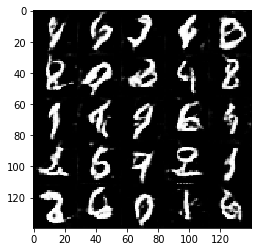

Epoch 1/2... Discriminator Loss: 0.9207... Generator Loss: 1.0930
Epoch 1/2... Discriminator Loss: 0.9842... Generator Loss: 2.8683
Epoch 1/2... Discriminator Loss: 0.7955... Generator Loss: 1.5495
Epoch 1/2... Discriminator Loss: 0.8933... Generator Loss: 1.3537
Epoch 1/2... Discriminator Loss: 0.7271... Generator Loss: 1.4048
Epoch 1/2... Discriminator Loss: 1.0212... Generator Loss: 0.8282
Epoch 1/2... Discriminator Loss: 0.8842... Generator Loss: 1.3051
Epoch 1/2... Discriminator Loss: 0.9019... Generator Loss: 1.0532
Epoch 1/2... Discriminator Loss: 0.6992... Generator Loss: 1.4758
Epoch 1/2... Discriminator Loss: 0.8061... Generator Loss: 1.1612


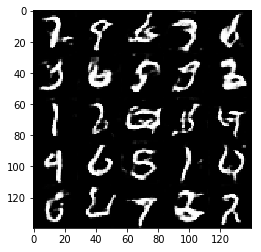

Epoch 1/2... Discriminator Loss: 0.6593... Generator Loss: 1.7192
Epoch 1/2... Discriminator Loss: 0.8492... Generator Loss: 1.4550
Epoch 1/2... Discriminator Loss: 1.3390... Generator Loss: 0.7433
Epoch 1/2... Discriminator Loss: 0.7999... Generator Loss: 1.2135
Epoch 1/2... Discriminator Loss: 1.1016... Generator Loss: 0.8479
Epoch 1/2... Discriminator Loss: 1.6234... Generator Loss: 0.4670
Epoch 1/2... Discriminator Loss: 1.2151... Generator Loss: 0.7073
Epoch 1/2... Discriminator Loss: 0.8809... Generator Loss: 1.1537
Epoch 1/2... Discriminator Loss: 0.7165... Generator Loss: 1.8079
Epoch 1/2... Discriminator Loss: 0.9351... Generator Loss: 2.0296


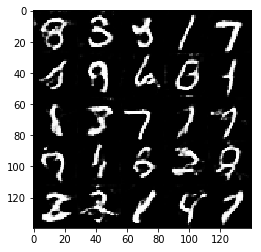

Epoch 1/2... Discriminator Loss: 1.0171... Generator Loss: 0.8919
Epoch 1/2... Discriminator Loss: 1.5263... Generator Loss: 2.7778
Epoch 1/2... Discriminator Loss: 0.8482... Generator Loss: 1.4216
Epoch 1/2... Discriminator Loss: 0.9710... Generator Loss: 0.9416
Epoch 1/2... Discriminator Loss: 0.9153... Generator Loss: 1.2291
Epoch 1/2... Discriminator Loss: 0.7834... Generator Loss: 1.4617
Epoch 1/2... Discriminator Loss: 0.6745... Generator Loss: 1.7385
Epoch 1/2... Discriminator Loss: 1.0942... Generator Loss: 0.7745
Epoch 1/2... Discriminator Loss: 0.5816... Generator Loss: 1.9783
Epoch 1/2... Discriminator Loss: 0.8114... Generator Loss: 1.2571


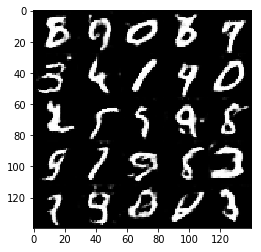

Epoch 1/2... Discriminator Loss: 1.1148... Generator Loss: 0.8204
Epoch 1/2... Discriminator Loss: 1.9400... Generator Loss: 3.3797
Epoch 1/2... Discriminator Loss: 1.0746... Generator Loss: 0.9689
Epoch 1/2... Discriminator Loss: 0.7160... Generator Loss: 1.5320
Epoch 1/2... Discriminator Loss: 0.8412... Generator Loss: 1.9810
Epoch 1/2... Discriminator Loss: 0.9087... Generator Loss: 1.1329
Epoch 1/2... Discriminator Loss: 0.8256... Generator Loss: 1.1707
Epoch 1/2... Discriminator Loss: 0.8628... Generator Loss: 1.1134
Epoch 1/2... Discriminator Loss: 0.7224... Generator Loss: 1.5272
Epoch 1/2... Discriminator Loss: 1.0784... Generator Loss: 2.8993


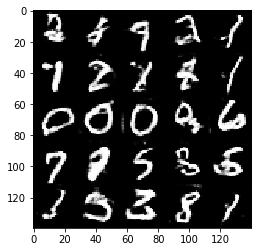

Epoch 1/2... Discriminator Loss: 0.9212... Generator Loss: 1.0957
Epoch 1/2... Discriminator Loss: 0.7688... Generator Loss: 1.2194
Epoch 1/2... Discriminator Loss: 0.6603... Generator Loss: 1.7571
Epoch 1/2... Discriminator Loss: 0.6119... Generator Loss: 1.7415
Epoch 1/2... Discriminator Loss: 0.7673... Generator Loss: 1.4199
Epoch 1/2... Discriminator Loss: 0.9052... Generator Loss: 2.2455
Epoch 1/2... Discriminator Loss: 1.0455... Generator Loss: 0.8498
Epoch 1/2... Discriminator Loss: 0.7184... Generator Loss: 1.3910
Epoch 1/2... Discriminator Loss: 0.9426... Generator Loss: 1.5057
Epoch 1/2... Discriminator Loss: 0.9532... Generator Loss: 0.9815


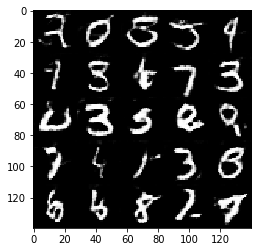

Epoch 1/2... Discriminator Loss: 0.9176... Generator Loss: 0.9855
Epoch 1/2... Discriminator Loss: 0.9170... Generator Loss: 1.0873
Epoch 1/2... Discriminator Loss: 1.1281... Generator Loss: 0.8238
Epoch 1/2... Discriminator Loss: 0.9016... Generator Loss: 1.1461
Epoch 1/2... Discriminator Loss: 0.8848... Generator Loss: 1.7599
Epoch 1/2... Discriminator Loss: 0.7445... Generator Loss: 1.3441
Epoch 1/2... Discriminator Loss: 0.6055... Generator Loss: 1.7880
Epoch 1/2... Discriminator Loss: 0.7803... Generator Loss: 1.5420
Epoch 1/2... Discriminator Loss: 0.7238... Generator Loss: 1.4509
Epoch 1/2... Discriminator Loss: 1.3846... Generator Loss: 0.5819


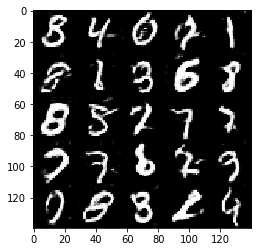

Epoch 1/2... Discriminator Loss: 1.3513... Generator Loss: 0.7071
Epoch 1/2... Discriminator Loss: 0.8479... Generator Loss: 1.0954
Epoch 1/2... Discriminator Loss: 0.8535... Generator Loss: 1.1720
Epoch 1/2... Discriminator Loss: 0.7929... Generator Loss: 1.5529
Epoch 1/2... Discriminator Loss: 0.5220... Generator Loss: 2.3421
Epoch 1/2... Discriminator Loss: 0.6850... Generator Loss: 1.5929
Epoch 1/2... Discriminator Loss: 0.4834... Generator Loss: 2.6054
Epoch 1/2... Discriminator Loss: 1.2160... Generator Loss: 0.8933
Epoch 1/2... Discriminator Loss: 0.6540... Generator Loss: 2.3060
Epoch 1/2... Discriminator Loss: 0.8853... Generator Loss: 1.4496


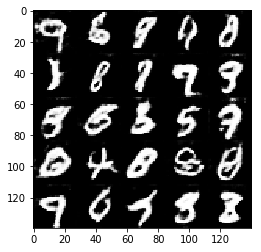

Epoch 1/2... Discriminator Loss: 0.9033... Generator Loss: 1.6906
Epoch 1/2... Discriminator Loss: 0.9019... Generator Loss: 1.1661
Epoch 1/2... Discriminator Loss: 0.8816... Generator Loss: 1.1235
Epoch 1/2... Discriminator Loss: 0.7663... Generator Loss: 1.3664
Epoch 1/2... Discriminator Loss: 0.7500... Generator Loss: 2.0084
Epoch 1/2... Discriminator Loss: 0.7629... Generator Loss: 1.4376
Epoch 1/2... Discriminator Loss: 0.6232... Generator Loss: 1.7654


In [12]:
batch_size = 64
z_dim = 128
learning_rate = 0.0005
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 0/1... Discriminator Loss: 1.4988... Generator Loss: 0.7541
Epoch 0/1... Discriminator Loss: 5.8329... Generator Loss: 11.0837
Epoch 0/1... Discriminator Loss: 2.3012... Generator Loss: 3.1054
Epoch 0/1... Discriminator Loss: 2.0015... Generator Loss: 4.8860
Epoch 0/1... Discriminator Loss: 0.8187... Generator Loss: 1.8033
Epoch 0/1... Discriminator Loss: 0.6036... Generator Loss: 2.3778
Epoch 0/1... Discriminator Loss: 1.0026... Generator Loss: 1.0953
Epoch 0/1... Discriminator Loss: 0.9250... Generator Loss: 1.0597
Epoch 0/1... Discriminator Loss: 0.8962... Generator Loss: 1.4353
Epoch 0/1... Discriminator Loss: 0.8998... Generator Loss: 1.0071


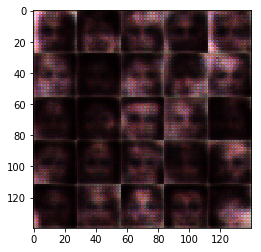

Epoch 0/1... Discriminator Loss: 2.3435... Generator Loss: 0.1934
Epoch 0/1... Discriminator Loss: 1.0596... Generator Loss: 1.2579
Epoch 0/1... Discriminator Loss: 1.2301... Generator Loss: 0.6388
Epoch 0/1... Discriminator Loss: 1.4615... Generator Loss: 0.4469
Epoch 0/1... Discriminator Loss: 0.7604... Generator Loss: 1.5266
Epoch 0/1... Discriminator Loss: 0.7643... Generator Loss: 1.9709
Epoch 0/1... Discriminator Loss: 1.8961... Generator Loss: 1.7401
Epoch 0/1... Discriminator Loss: 1.4428... Generator Loss: 0.7568
Epoch 0/1... Discriminator Loss: 1.3248... Generator Loss: 1.1810
Epoch 0/1... Discriminator Loss: 1.1113... Generator Loss: 1.2692


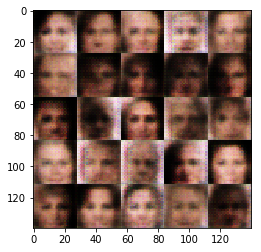

Epoch 0/1... Discriminator Loss: 1.4226... Generator Loss: 0.7508
Epoch 0/1... Discriminator Loss: 1.2231... Generator Loss: 0.9224
Epoch 0/1... Discriminator Loss: 1.2597... Generator Loss: 0.8507
Epoch 0/1... Discriminator Loss: 1.0777... Generator Loss: 0.7579
Epoch 0/1... Discriminator Loss: 1.0803... Generator Loss: 0.9232
Epoch 0/1... Discriminator Loss: 1.2644... Generator Loss: 0.8123
Epoch 0/1... Discriminator Loss: 1.0976... Generator Loss: 0.8744
Epoch 0/1... Discriminator Loss: 1.0053... Generator Loss: 1.4189
Epoch 0/1... Discriminator Loss: 2.1271... Generator Loss: 0.4042
Epoch 0/1... Discriminator Loss: 1.4468... Generator Loss: 0.9824


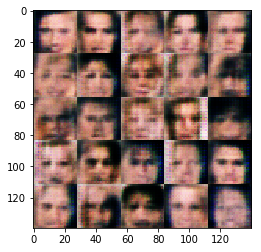

Epoch 0/1... Discriminator Loss: 1.2244... Generator Loss: 1.0955
Epoch 0/1... Discriminator Loss: 1.2937... Generator Loss: 0.7249
Epoch 0/1... Discriminator Loss: 1.1259... Generator Loss: 1.4455
Epoch 0/1... Discriminator Loss: 0.9781... Generator Loss: 1.0500
Epoch 0/1... Discriminator Loss: 1.2394... Generator Loss: 0.8075
Epoch 0/1... Discriminator Loss: 1.5943... Generator Loss: 0.6615
Epoch 0/1... Discriminator Loss: 1.2136... Generator Loss: 1.4107
Epoch 0/1... Discriminator Loss: 1.1619... Generator Loss: 0.7486
Epoch 0/1... Discriminator Loss: 1.5650... Generator Loss: 2.3551
Epoch 0/1... Discriminator Loss: 1.0985... Generator Loss: 0.8476


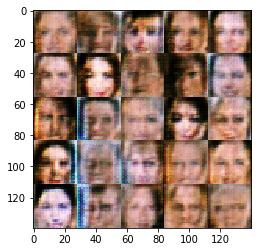

Epoch 0/1... Discriminator Loss: 1.6622... Generator Loss: 0.3892
Epoch 0/1... Discriminator Loss: 1.2660... Generator Loss: 0.8684
Epoch 0/1... Discriminator Loss: 1.1871... Generator Loss: 0.8474
Epoch 0/1... Discriminator Loss: 1.0100... Generator Loss: 1.0519
Epoch 0/1... Discriminator Loss: 1.7261... Generator Loss: 0.4884
Epoch 0/1... Discriminator Loss: 1.3549... Generator Loss: 0.6967
Epoch 0/1... Discriminator Loss: 1.6680... Generator Loss: 1.4918
Epoch 0/1... Discriminator Loss: 1.2812... Generator Loss: 0.9488
Epoch 0/1... Discriminator Loss: 1.3356... Generator Loss: 0.9383
Epoch 0/1... Discriminator Loss: 1.5893... Generator Loss: 1.5314


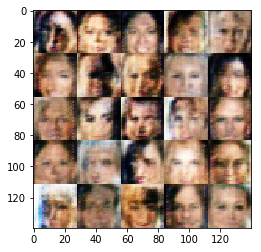

Epoch 0/1... Discriminator Loss: 1.6809... Generator Loss: 0.4121
Epoch 0/1... Discriminator Loss: 1.2065... Generator Loss: 1.2947
Epoch 0/1... Discriminator Loss: 1.4252... Generator Loss: 0.9250
Epoch 0/1... Discriminator Loss: 1.2169... Generator Loss: 1.1598
Epoch 0/1... Discriminator Loss: 1.4031... Generator Loss: 0.5231
Epoch 0/1... Discriminator Loss: 1.6544... Generator Loss: 0.4987
Epoch 0/1... Discriminator Loss: 1.3472... Generator Loss: 0.6226
Epoch 0/1... Discriminator Loss: 1.3005... Generator Loss: 0.9919
Epoch 0/1... Discriminator Loss: 1.3119... Generator Loss: 0.7687
Epoch 0/1... Discriminator Loss: 1.4907... Generator Loss: 1.7088


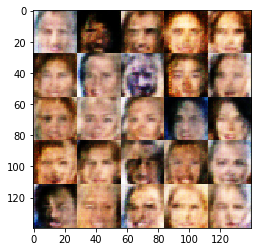

Epoch 0/1... Discriminator Loss: 1.0999... Generator Loss: 0.8526
Epoch 0/1... Discriminator Loss: 1.4073... Generator Loss: 0.7053
Epoch 0/1... Discriminator Loss: 1.3449... Generator Loss: 0.6053
Epoch 0/1... Discriminator Loss: 1.3898... Generator Loss: 0.8032
Epoch 0/1... Discriminator Loss: 1.1508... Generator Loss: 1.4531
Epoch 0/1... Discriminator Loss: 1.3153... Generator Loss: 0.6710
Epoch 0/1... Discriminator Loss: 1.3113... Generator Loss: 0.7667
Epoch 0/1... Discriminator Loss: 1.4753... Generator Loss: 0.8040
Epoch 0/1... Discriminator Loss: 1.3391... Generator Loss: 0.9629
Epoch 0/1... Discriminator Loss: 1.1245... Generator Loss: 1.0925


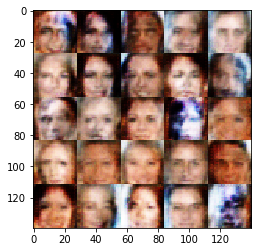

Epoch 0/1... Discriminator Loss: 1.3676... Generator Loss: 0.7819
Epoch 0/1... Discriminator Loss: 1.3698... Generator Loss: 1.3158
Epoch 0/1... Discriminator Loss: 1.3159... Generator Loss: 0.8458
Epoch 0/1... Discriminator Loss: 1.3989... Generator Loss: 0.8339
Epoch 0/1... Discriminator Loss: 1.2125... Generator Loss: 1.2129
Epoch 0/1... Discriminator Loss: 1.3478... Generator Loss: 0.9310
Epoch 0/1... Discriminator Loss: 1.3220... Generator Loss: 1.1759
Epoch 0/1... Discriminator Loss: 1.3247... Generator Loss: 0.8194
Epoch 0/1... Discriminator Loss: 1.3181... Generator Loss: 0.7569
Epoch 0/1... Discriminator Loss: 1.3230... Generator Loss: 0.8252


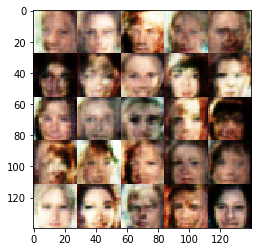

Epoch 0/1... Discriminator Loss: 1.4161... Generator Loss: 0.8376
Epoch 0/1... Discriminator Loss: 1.4523... Generator Loss: 0.7524
Epoch 0/1... Discriminator Loss: 1.2972... Generator Loss: 0.8873
Epoch 0/1... Discriminator Loss: 1.2464... Generator Loss: 0.8037
Epoch 0/1... Discriminator Loss: 1.3402... Generator Loss: 0.8025
Epoch 0/1... Discriminator Loss: 1.3345... Generator Loss: 0.8663
Epoch 0/1... Discriminator Loss: 1.3626... Generator Loss: 0.6679
Epoch 0/1... Discriminator Loss: 1.4383... Generator Loss: 0.5285
Epoch 0/1... Discriminator Loss: 1.8671... Generator Loss: 0.2596
Epoch 0/1... Discriminator Loss: 1.3243... Generator Loss: 0.7723


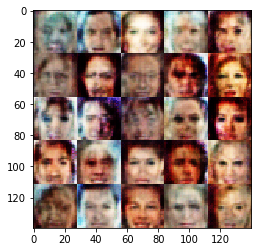

Epoch 0/1... Discriminator Loss: 1.3134... Generator Loss: 0.7527
Epoch 0/1... Discriminator Loss: 1.3039... Generator Loss: 0.7241
Epoch 0/1... Discriminator Loss: 1.4586... Generator Loss: 0.8399
Epoch 0/1... Discriminator Loss: 1.3429... Generator Loss: 0.7282
Epoch 0/1... Discriminator Loss: 1.3175... Generator Loss: 0.8966
Epoch 0/1... Discriminator Loss: 1.4125... Generator Loss: 0.7285
Epoch 0/1... Discriminator Loss: 1.2928... Generator Loss: 0.7838
Epoch 0/1... Discriminator Loss: 1.2672... Generator Loss: 0.7318
Epoch 0/1... Discriminator Loss: 1.3400... Generator Loss: 0.9172
Epoch 0/1... Discriminator Loss: 1.2642... Generator Loss: 1.0371


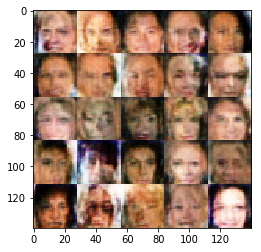

Epoch 0/1... Discriminator Loss: 1.2132... Generator Loss: 1.4170
Epoch 0/1... Discriminator Loss: 1.3371... Generator Loss: 0.7906
Epoch 0/1... Discriminator Loss: 1.3492... Generator Loss: 0.8040
Epoch 0/1... Discriminator Loss: 1.2491... Generator Loss: 0.9027
Epoch 0/1... Discriminator Loss: 1.4588... Generator Loss: 0.6467
Epoch 0/1... Discriminator Loss: 1.3008... Generator Loss: 0.9626
Epoch 0/1... Discriminator Loss: 1.3619... Generator Loss: 0.9433
Epoch 0/1... Discriminator Loss: 1.3442... Generator Loss: 0.7388
Epoch 0/1... Discriminator Loss: 1.3236... Generator Loss: 0.7792
Epoch 0/1... Discriminator Loss: 1.3093... Generator Loss: 0.8501


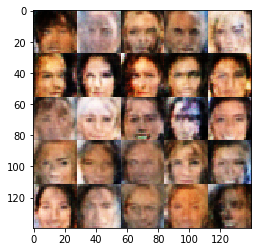

Epoch 0/1... Discriminator Loss: 1.3179... Generator Loss: 0.7075
Epoch 0/1... Discriminator Loss: 1.2912... Generator Loss: 1.4171
Epoch 0/1... Discriminator Loss: 1.1088... Generator Loss: 1.0306
Epoch 0/1... Discriminator Loss: 1.2603... Generator Loss: 1.0423
Epoch 0/1... Discriminator Loss: 1.4506... Generator Loss: 0.7189
Epoch 0/1... Discriminator Loss: 1.3046... Generator Loss: 0.8867
Epoch 0/1... Discriminator Loss: 1.3723... Generator Loss: 0.7124
Epoch 0/1... Discriminator Loss: 1.2508... Generator Loss: 0.7261
Epoch 0/1... Discriminator Loss: 1.4206... Generator Loss: 0.6898
Epoch 0/1... Discriminator Loss: 1.1462... Generator Loss: 1.0095


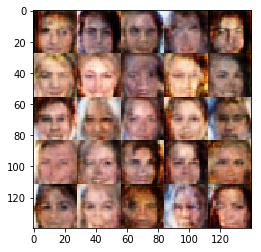

Epoch 0/1... Discriminator Loss: 1.3370... Generator Loss: 0.8139
Epoch 0/1... Discriminator Loss: 1.3634... Generator Loss: 0.8257
Epoch 0/1... Discriminator Loss: 1.3251... Generator Loss: 0.8268
Epoch 0/1... Discriminator Loss: 1.3464... Generator Loss: 1.2102
Epoch 0/1... Discriminator Loss: 1.3763... Generator Loss: 1.0819
Epoch 0/1... Discriminator Loss: 1.4147... Generator Loss: 1.2948
Epoch 0/1... Discriminator Loss: 1.2257... Generator Loss: 0.7609
Epoch 0/1... Discriminator Loss: 1.3283... Generator Loss: 0.8319
Epoch 0/1... Discriminator Loss: 1.2048... Generator Loss: 0.9298
Epoch 0/1... Discriminator Loss: 1.3792... Generator Loss: 1.0224


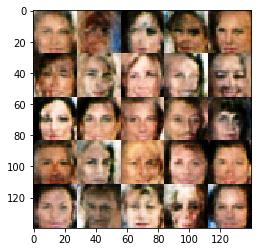

Epoch 0/1... Discriminator Loss: 1.2066... Generator Loss: 0.8593
Epoch 0/1... Discriminator Loss: 1.4806... Generator Loss: 0.4880
Epoch 0/1... Discriminator Loss: 1.6115... Generator Loss: 1.2823
Epoch 0/1... Discriminator Loss: 1.2883... Generator Loss: 0.9823
Epoch 0/1... Discriminator Loss: 1.2590... Generator Loss: 0.7712
Epoch 0/1... Discriminator Loss: 1.2909... Generator Loss: 0.8090
Epoch 0/1... Discriminator Loss: 1.3168... Generator Loss: 0.9306
Epoch 0/1... Discriminator Loss: 1.3544... Generator Loss: 0.8204
Epoch 0/1... Discriminator Loss: 1.0483... Generator Loss: 1.0966
Epoch 0/1... Discriminator Loss: 1.3151... Generator Loss: 0.9455


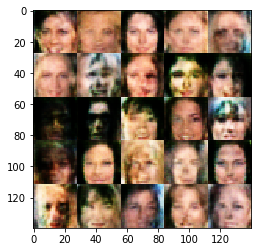

Epoch 0/1... Discriminator Loss: 1.4789... Generator Loss: 0.5437
Epoch 0/1... Discriminator Loss: 1.4412... Generator Loss: 0.5798
Epoch 0/1... Discriminator Loss: 1.3831... Generator Loss: 0.8078
Epoch 0/1... Discriminator Loss: 1.4581... Generator Loss: 0.5623
Epoch 0/1... Discriminator Loss: 1.3726... Generator Loss: 0.7751
Epoch 0/1... Discriminator Loss: 1.3381... Generator Loss: 0.7949
Epoch 0/1... Discriminator Loss: 1.4510... Generator Loss: 0.6388
Epoch 0/1... Discriminator Loss: 1.3839... Generator Loss: 0.6904
Epoch 0/1... Discriminator Loss: 1.3433... Generator Loss: 0.8218
Epoch 0/1... Discriminator Loss: 1.3301... Generator Loss: 0.6156


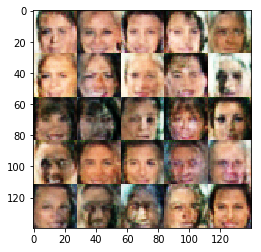

Epoch 0/1... Discriminator Loss: 1.3189... Generator Loss: 0.9359
Epoch 0/1... Discriminator Loss: 1.3242... Generator Loss: 1.1536
Epoch 0/1... Discriminator Loss: 1.2878... Generator Loss: 0.7483
Epoch 0/1... Discriminator Loss: 1.4768... Generator Loss: 1.1580
Epoch 0/1... Discriminator Loss: 1.3952... Generator Loss: 0.7609
Epoch 0/1... Discriminator Loss: 1.2314... Generator Loss: 0.7683
Epoch 0/1... Discriminator Loss: 1.3036... Generator Loss: 0.7507
Epoch 0/1... Discriminator Loss: 1.4982... Generator Loss: 0.5146
Epoch 0/1... Discriminator Loss: 1.3467... Generator Loss: 0.7773
Epoch 0/1... Discriminator Loss: 1.3872... Generator Loss: 0.7993


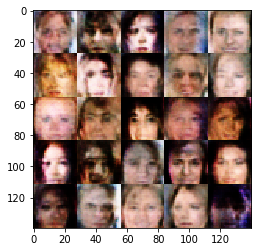

Epoch 0/1... Discriminator Loss: 1.3286... Generator Loss: 0.8265
Epoch 0/1... Discriminator Loss: 1.2188... Generator Loss: 0.7955
Epoch 0/1... Discriminator Loss: 1.2180... Generator Loss: 0.9094
Epoch 0/1... Discriminator Loss: 1.7592... Generator Loss: 1.6275
Epoch 0/1... Discriminator Loss: 1.3416... Generator Loss: 0.8146
Epoch 0/1... Discriminator Loss: 1.3376... Generator Loss: 0.7848
Epoch 0/1... Discriminator Loss: 0.9880... Generator Loss: 1.1063
Epoch 0/1... Discriminator Loss: 1.3116... Generator Loss: 0.9149
Epoch 0/1... Discriminator Loss: 1.4149... Generator Loss: 1.1532
Epoch 0/1... Discriminator Loss: 1.2377... Generator Loss: 0.7957


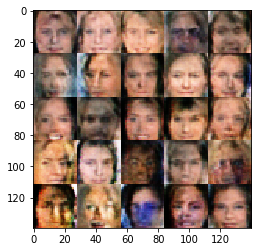

Epoch 0/1... Discriminator Loss: 1.3957... Generator Loss: 0.6520
Epoch 0/1... Discriminator Loss: 1.3497... Generator Loss: 0.6977
Epoch 0/1... Discriminator Loss: 1.2205... Generator Loss: 0.8639
Epoch 0/1... Discriminator Loss: 1.0956... Generator Loss: 0.8951
Epoch 0/1... Discriminator Loss: 1.2963... Generator Loss: 1.0379
Epoch 0/1... Discriminator Loss: 1.3603... Generator Loss: 0.7594
Epoch 0/1... Discriminator Loss: 1.1976... Generator Loss: 0.8689
Epoch 0/1... Discriminator Loss: 1.4126... Generator Loss: 0.6549
Epoch 0/1... Discriminator Loss: 1.6587... Generator Loss: 0.3619
Epoch 0/1... Discriminator Loss: 1.2455... Generator Loss: 0.8288


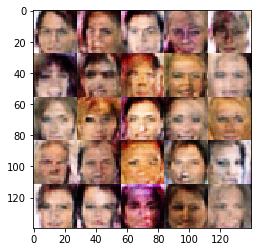

Epoch 0/1... Discriminator Loss: 1.4077... Generator Loss: 0.7652
Epoch 0/1... Discriminator Loss: 1.4370... Generator Loss: 0.5059
Epoch 0/1... Discriminator Loss: 1.2963... Generator Loss: 1.2271
Epoch 0/1... Discriminator Loss: 1.2852... Generator Loss: 0.9796
Epoch 0/1... Discriminator Loss: 1.2945... Generator Loss: 0.7483
Epoch 0/1... Discriminator Loss: 1.2876... Generator Loss: 0.7356
Epoch 0/1... Discriminator Loss: 1.3333... Generator Loss: 0.7768
Epoch 0/1... Discriminator Loss: 1.3284... Generator Loss: 0.8934
Epoch 0/1... Discriminator Loss: 1.3318... Generator Loss: 0.8007
Epoch 0/1... Discriminator Loss: 1.4100... Generator Loss: 0.7647


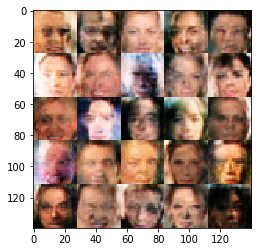

Epoch 0/1... Discriminator Loss: 1.3799... Generator Loss: 0.9470
Epoch 0/1... Discriminator Loss: 1.3863... Generator Loss: 1.3758
Epoch 0/1... Discriminator Loss: 1.4696... Generator Loss: 0.7582
Epoch 0/1... Discriminator Loss: 1.2189... Generator Loss: 0.9693
Epoch 0/1... Discriminator Loss: 1.3100... Generator Loss: 0.6194
Epoch 0/1... Discriminator Loss: 1.2237... Generator Loss: 1.1143
Epoch 0/1... Discriminator Loss: 1.3067... Generator Loss: 0.6890
Epoch 0/1... Discriminator Loss: 1.3608... Generator Loss: 0.8018
Epoch 0/1... Discriminator Loss: 1.2132... Generator Loss: 0.7904
Epoch 0/1... Discriminator Loss: 1.5495... Generator Loss: 0.4408


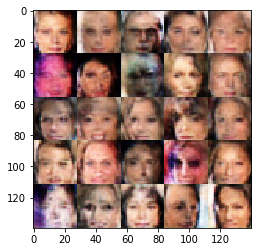

Epoch 0/1... Discriminator Loss: 1.3483... Generator Loss: 1.1899
Epoch 0/1... Discriminator Loss: 1.2414... Generator Loss: 0.7049
Epoch 0/1... Discriminator Loss: 1.4308... Generator Loss: 1.3261
Epoch 0/1... Discriminator Loss: 1.2214... Generator Loss: 2.5939
Epoch 0/1... Discriminator Loss: 1.2151... Generator Loss: 1.0515
Epoch 0/1... Discriminator Loss: 1.2709... Generator Loss: 0.7433
Epoch 0/1... Discriminator Loss: 1.2336... Generator Loss: 0.9864
Epoch 0/1... Discriminator Loss: 1.2866... Generator Loss: 0.6147
Epoch 0/1... Discriminator Loss: 1.0634... Generator Loss: 1.2372
Epoch 0/1... Discriminator Loss: 1.1917... Generator Loss: 0.9547


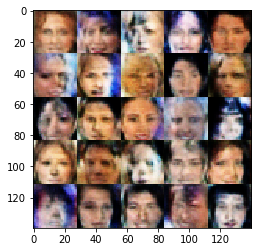

Epoch 0/1... Discriminator Loss: 1.4515... Generator Loss: 0.4915
Epoch 0/1... Discriminator Loss: 1.5605... Generator Loss: 0.4192
Epoch 0/1... Discriminator Loss: 1.3365... Generator Loss: 0.9835
Epoch 0/1... Discriminator Loss: 1.2061... Generator Loss: 0.8276
Epoch 0/1... Discriminator Loss: 1.3923... Generator Loss: 0.9206
Epoch 0/1... Discriminator Loss: 1.0836... Generator Loss: 1.3382
Epoch 0/1... Discriminator Loss: 1.3443... Generator Loss: 0.6578
Epoch 0/1... Discriminator Loss: 1.5867... Generator Loss: 1.7318
Epoch 0/1... Discriminator Loss: 1.3286... Generator Loss: 0.6786
Epoch 0/1... Discriminator Loss: 1.2800... Generator Loss: 0.8567


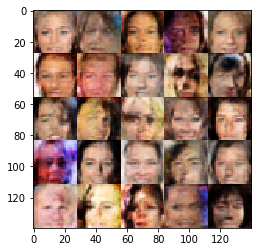

Epoch 0/1... Discriminator Loss: 1.1309... Generator Loss: 0.9671
Epoch 0/1... Discriminator Loss: 1.1039... Generator Loss: 0.9939
Epoch 0/1... Discriminator Loss: 1.1800... Generator Loss: 1.1358
Epoch 0/1... Discriminator Loss: 1.3216... Generator Loss: 0.9467
Epoch 0/1... Discriminator Loss: 1.1210... Generator Loss: 1.2025
Epoch 0/1... Discriminator Loss: 1.2905... Generator Loss: 0.6099
Epoch 0/1... Discriminator Loss: 1.5545... Generator Loss: 0.4728
Epoch 0/1... Discriminator Loss: 1.3364... Generator Loss: 0.9236
Epoch 0/1... Discriminator Loss: 1.3252... Generator Loss: 0.9318
Epoch 0/1... Discriminator Loss: 1.2096... Generator Loss: 1.6375


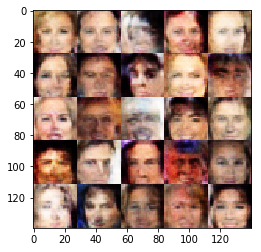

Epoch 0/1... Discriminator Loss: 1.3963... Generator Loss: 0.5809
Epoch 0/1... Discriminator Loss: 1.2686... Generator Loss: 0.8257
Epoch 0/1... Discriminator Loss: 1.1986... Generator Loss: 0.8457
Epoch 0/1... Discriminator Loss: 1.1992... Generator Loss: 0.7844
Epoch 0/1... Discriminator Loss: 0.9439... Generator Loss: 1.0581
Epoch 0/1... Discriminator Loss: 1.2546... Generator Loss: 1.2888
Epoch 0/1... Discriminator Loss: 1.2744... Generator Loss: 0.8115
Epoch 0/1... Discriminator Loss: 1.1434... Generator Loss: 0.8281
Epoch 0/1... Discriminator Loss: 1.3649... Generator Loss: 0.6013
Epoch 0/1... Discriminator Loss: 1.1901... Generator Loss: 1.0259


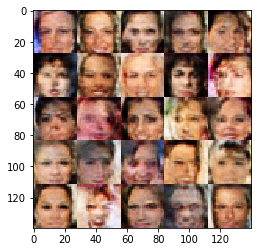

Epoch 0/1... Discriminator Loss: 1.1542... Generator Loss: 0.8046
Epoch 0/1... Discriminator Loss: 0.9538... Generator Loss: 0.9939
Epoch 0/1... Discriminator Loss: 1.1037... Generator Loss: 1.4271
Epoch 0/1... Discriminator Loss: 1.2479... Generator Loss: 1.0738
Epoch 0/1... Discriminator Loss: 1.4938... Generator Loss: 1.7862
Epoch 0/1... Discriminator Loss: 1.1855... Generator Loss: 0.9789
Epoch 0/1... Discriminator Loss: 1.1130... Generator Loss: 0.9877
Epoch 0/1... Discriminator Loss: 1.1038... Generator Loss: 1.2938
Epoch 0/1... Discriminator Loss: 1.2463... Generator Loss: 0.8770
Epoch 0/1... Discriminator Loss: 1.3886... Generator Loss: 0.6605


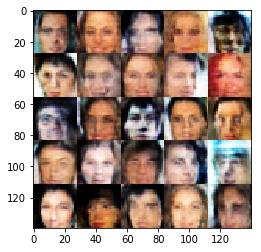

Epoch 0/1... Discriminator Loss: 1.3293... Generator Loss: 0.9629
Epoch 0/1... Discriminator Loss: 1.2535... Generator Loss: 0.7961
Epoch 0/1... Discriminator Loss: 1.2310... Generator Loss: 1.0272
Epoch 0/1... Discriminator Loss: 1.0302... Generator Loss: 0.8904
Epoch 0/1... Discriminator Loss: 1.4840... Generator Loss: 0.4803
Epoch 0/1... Discriminator Loss: 1.2845... Generator Loss: 1.0342
Epoch 0/1... Discriminator Loss: 1.3604... Generator Loss: 0.7031
Epoch 0/1... Discriminator Loss: 1.0548... Generator Loss: 1.0512
Epoch 0/1... Discriminator Loss: 1.3444... Generator Loss: 0.8229
Epoch 0/1... Discriminator Loss: 1.4156... Generator Loss: 0.5734


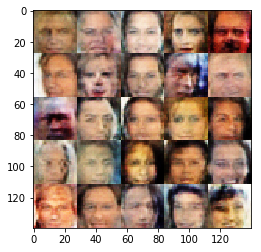

Epoch 0/1... Discriminator Loss: 1.3005... Generator Loss: 1.0794
Epoch 0/1... Discriminator Loss: 1.3856... Generator Loss: 0.7311
Epoch 0/1... Discriminator Loss: 1.0786... Generator Loss: 1.2713
Epoch 0/1... Discriminator Loss: 1.2982... Generator Loss: 0.8189
Epoch 0/1... Discriminator Loss: 1.2192... Generator Loss: 1.2338
Epoch 0/1... Discriminator Loss: 1.0342... Generator Loss: 1.3173
Epoch 0/1... Discriminator Loss: 1.1248... Generator Loss: 0.9535
Epoch 0/1... Discriminator Loss: 1.2028... Generator Loss: 0.9258
Epoch 0/1... Discriminator Loss: 1.2875... Generator Loss: 0.8893
Epoch 0/1... Discriminator Loss: 1.0021... Generator Loss: 1.0174


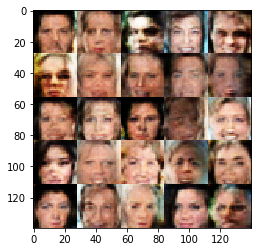

Epoch 0/1... Discriminator Loss: 1.1040... Generator Loss: 0.8725
Epoch 0/1... Discriminator Loss: 1.6618... Generator Loss: 0.3959
Epoch 0/1... Discriminator Loss: 1.4226... Generator Loss: 0.5667
Epoch 0/1... Discriminator Loss: 1.1225... Generator Loss: 0.7565
Epoch 0/1... Discriminator Loss: 1.2370... Generator Loss: 0.7072
Epoch 0/1... Discriminator Loss: 1.2296... Generator Loss: 0.9847
Epoch 0/1... Discriminator Loss: 1.3140... Generator Loss: 0.8128
Epoch 0/1... Discriminator Loss: 1.3222... Generator Loss: 0.9238
Epoch 0/1... Discriminator Loss: 1.8335... Generator Loss: 0.2875
Epoch 0/1... Discriminator Loss: 1.1058... Generator Loss: 0.9166


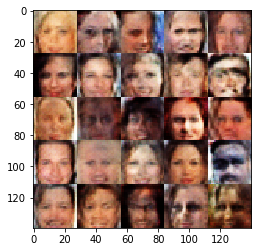

Epoch 0/1... Discriminator Loss: 1.3314... Generator Loss: 0.6119
Epoch 0/1... Discriminator Loss: 1.1280... Generator Loss: 1.0156
Epoch 0/1... Discriminator Loss: 1.3061... Generator Loss: 0.7499
Epoch 0/1... Discriminator Loss: 1.1795... Generator Loss: 0.8847
Epoch 0/1... Discriminator Loss: 1.1754... Generator Loss: 0.8647
Epoch 0/1... Discriminator Loss: 1.2369... Generator Loss: 0.7365
Epoch 0/1... Discriminator Loss: 1.3477... Generator Loss: 0.6553
Epoch 0/1... Discriminator Loss: 1.3710... Generator Loss: 0.8183
Epoch 0/1... Discriminator Loss: 1.3760... Generator Loss: 0.6229
Epoch 0/1... Discriminator Loss: 1.3728... Generator Loss: 0.6765


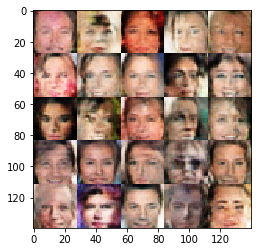

Epoch 0/1... Discriminator Loss: 1.4530... Generator Loss: 0.6436
Epoch 0/1... Discriminator Loss: 1.3381... Generator Loss: 0.9077
Epoch 0/1... Discriminator Loss: 1.5036... Generator Loss: 0.4794
Epoch 0/1... Discriminator Loss: 1.2908... Generator Loss: 0.8840
Epoch 0/1... Discriminator Loss: 1.1514... Generator Loss: 1.0672
Epoch 0/1... Discriminator Loss: 1.1303... Generator Loss: 1.4089
Epoch 0/1... Discriminator Loss: 1.1168... Generator Loss: 1.0110
Epoch 0/1... Discriminator Loss: 1.2458... Generator Loss: 0.7038
Epoch 0/1... Discriminator Loss: 1.3665... Generator Loss: 0.6295
Epoch 0/1... Discriminator Loss: 1.4262... Generator Loss: 0.4724


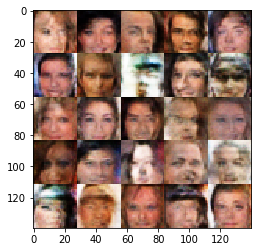

Epoch 0/1... Discriminator Loss: 1.3531... Generator Loss: 1.1168
Epoch 0/1... Discriminator Loss: 1.2099... Generator Loss: 0.8112
Epoch 0/1... Discriminator Loss: 1.3755... Generator Loss: 1.3860
Epoch 0/1... Discriminator Loss: 1.3660... Generator Loss: 0.6188
Epoch 0/1... Discriminator Loss: 1.2933... Generator Loss: 0.6839
Epoch 0/1... Discriminator Loss: 1.1973... Generator Loss: 0.8527
Epoch 0/1... Discriminator Loss: 1.2236... Generator Loss: 0.8131
Epoch 0/1... Discriminator Loss: 1.4084... Generator Loss: 1.7195
Epoch 0/1... Discriminator Loss: 1.2974... Generator Loss: 0.7584
Epoch 0/1... Discriminator Loss: 1.2884... Generator Loss: 0.6954


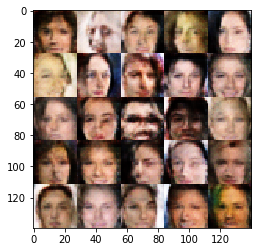

Epoch 0/1... Discriminator Loss: 1.0999... Generator Loss: 0.8165
Epoch 0/1... Discriminator Loss: 1.3451... Generator Loss: 0.5839
Epoch 0/1... Discriminator Loss: 1.1989... Generator Loss: 0.9741
Epoch 0/1... Discriminator Loss: 1.3282... Generator Loss: 0.7574
Epoch 0/1... Discriminator Loss: 1.3980... Generator Loss: 0.5885
Epoch 0/1... Discriminator Loss: 1.3137... Generator Loss: 0.6289


In [13]:
batch_size = 64
z_dim = 128
learning_rate = 0.0005
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.